In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/alfloos.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
five = os.listdir('/content/alfloos/5')
print(five[:5])


['SR 5 (46).JPG', 'SR 5 (47).jpeg', 'SR 5 (71).jpg', 'SR 5 (49).jpg', 'SR 5 (10).jpeg']


In [10]:
ten = os.listdir('/content/alfloos/10')
print(ten[:5])

['SR 10 (22).jpg', 'SR 10 (20).jpeg', 'SR 10 (37).JPG', 'SR 10 (24).jpeg', 'SR 10 (39).jpeg']


In [11]:
fifty = os.listdir('/content/alfloos/50')
print(fifty[:5])

['SR 50 (27).jpg', 'SR 50 (77).jpg', 'SR 50 (66).jpeg', 'SR 50 (41).JPG', 'SR 50 (12).jpg']


In [12]:
print('Number of 5 images:', len(five))
print('Number of 10 images:', len(ten))
print('Number of 50 images:', len(fifty))

Number of 5 images: 190
Number of 10 images: 190
Number of 50 images: 190


**Creating Labels for the two class of Images**

5  --> 0

10  -->  1

50 --> 2

In [13]:
# create the labels

five = [0]*190
ten = [1]*190
fifty = [2]*190


In [14]:
print(five[0:5])

print(ten[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [15]:
labels = five + ten +fifty

print(len(labels))
print(labels[0:5])
print(labels[-5:])

570
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

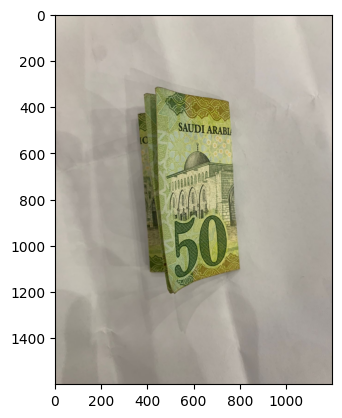

In [16]:
# displaying with mask image
img = mpimg.imread('/content/alfloos/50/SR 50 (36).jpeg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [166]:
# convert images to numpy arrays+
five = os.listdir('/content/alfloos/5')
ten = os.listdir('/content/alfloos/10')
fifty = os.listdir('/content/alfloos/50')
data = []


for img_file in five:

  image = Image.open('/content/alfloos/5/' + img_file)
  image = image.resize((224, 224))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




for img_file in ten:

  image = Image.open('/content/alfloos/10/' + img_file)
  image = image.resize((224, 224))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



for img_file in fifty:

  image = Image.open('/content/alfloos/50/' + img_file)
  image = image.resize((224, 224))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [167]:
type(data)

list

In [168]:
len(data)

570

array([[[208, 208, 206],
        [208, 208, 206],
        [207, 207, 205],
        ...,
        [209, 209, 207],
        [210, 210, 208],
        [208, 208, 206]],

       [[206, 206, 204],
        [205, 205, 203],
        [202, 202, 200],
        ...,
        [208, 208, 206],
        [208, 208, 206],
        [208, 208, 206]],

       [[204, 204, 202],
        [203, 203, 201],
        [201, 201, 199],
        ...,
        [206, 206, 204],
        [206, 206, 204],
        [208, 208, 206]],

       ...,

       [[120, 119, 114],
        [121, 120, 115],
        [122, 121, 116],
        ...,
        [174, 174, 172],
        [173, 173, 171],
        [173, 173, 171]],

       [[120, 119, 114],
        [122, 121, 116],
        [123, 122, 117],
        ...,
        [173, 173, 171],
        [173, 173, 171],
        [174, 174, 172]],

       [[120, 119, 114],
        [122, 121, 116],
        [124, 123, 118],
        ...,
        [172, 172, 170],
        [174, 174, 172],
        [173, 173, 171]]], dtype=uint8)
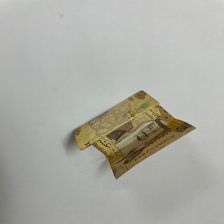

In [169]:
data[300]

In [170]:
type(data[0])

numpy.ndarray

In [171]:
data[0].shape

(224, 224, 3)

In [172]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [173]:
type(X)

numpy.ndarray

In [174]:
type(Y)

numpy.ndarray

In [175]:
print(X.shape)
print(Y.shape)

(570, 224, 224, 3)
(570,)


In [176]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

**Train Test Split**

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [178]:
print(X.shape, X_train.shape, X_test.shape)

(570, 224, 224, 3) (456, 224, 224, 3) (114, 224, 224, 3)


In [179]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
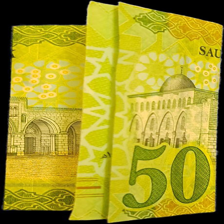

In [180]:
X_train[0]

In [181]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a Convolutional Neural Networks (CNN)**

In [182]:
import tensorflow as tf
from tensorflow import keras

In [183]:
num_of_classes = 3

model = keras.Sequential([

keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.10),

keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu'),
keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,445,283 (5.51 MB)

 Trainable params: 1,445,283 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - acc: 0.3550 - loss: 1.1120 - val_acc: 0.2391 - val_loss: 1.0997
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3491 - loss: 1.0993 - val_acc: 0.2391 - val_loss: 1.0995
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3611 - loss: 1.0976 - val_acc: 0.5870 - val_loss: 1.0919
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4193 - loss: 1.0917 - val_acc: 0.3261 - val_loss: 1.0837
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.3822 - loss: 1.0743 - val_acc: 0.5217 - val_loss: 1.0129
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5938 - loss: 0.9941 - val_acc: 0.3913 - val_loss: 1.0357
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.5326 - loss: 0.9983 - val_acc: 0.5870 - val_loss: 0.8609
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5908 - loss: 0.8966 - val_acc: 0.6522 - val_loss: 0.7517
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.76

In [39]:
num_of_classes = 3

model = keras.Sequential([

keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.10),

keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.GlobalAveragePooling2D(),

keras.layers.Dense(1024, activation='relu'),
keras.layers.Dense(num_of_classes, activation='softmax')
])

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,851 (2.51 MB)

 Trainable params: 658,851 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=35)

Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - acc: 0.3337 - loss: 1.1014 - val_acc: 0.3913 - val_loss: 1.0885
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - acc: 0.3924 - loss: 1.0891 - val_acc: 0.5217 - val_loss: 0.9405
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.5280 - loss: 0.9963 - val_acc: 0.2826 - val_loss: 1.0952
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.3264 - loss: 1.1236 - val_acc: 0.3696 - val_loss: 1.0978
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.3394 - loss: 1.0837 - val_acc: 0.5217 - val_loss: 0.8978
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5502 - loss: 0.9565 - val_acc: 0.5435 - val_loss: 0.7684
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.4922 - loss: 0.9405 - val_acc: 0.6087 - val_loss: 0.7154
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.5348 - loss: 0.8051 - val_acc: 0.6087 - val_loss: 0.6602
Epoch 9/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.589

**Model Evaluation**

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - acc: 0.9282 - loss: 0.2626
Test Accuracy = 0.9298245906829834


In [44]:
model.predict(X_test[12].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


array([[0., 1., 0.]], dtype=float32)

In [45]:
Y_test[12]

np.int64(1)

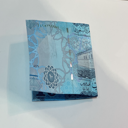

In [46]:
cv2_imshow(X_test[12])

In [47]:
model.predict(X_test[51].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0., 0., 1.]], dtype=float32)

In [48]:
Y_test[51]

np.int64(2)

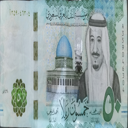

In [49]:
cv2_imshow(X_test[51])

In [50]:
model.predict(X_test[34].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1., 0., 0.]], dtype=float32)

In [51]:
Y_test[34]

np.int64(0)

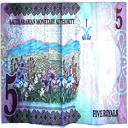

In [52]:
cv2_imshow(X_test[34])

**Predictive System**

Path of the image to be predicted: /content/SR 5 (6).jpg


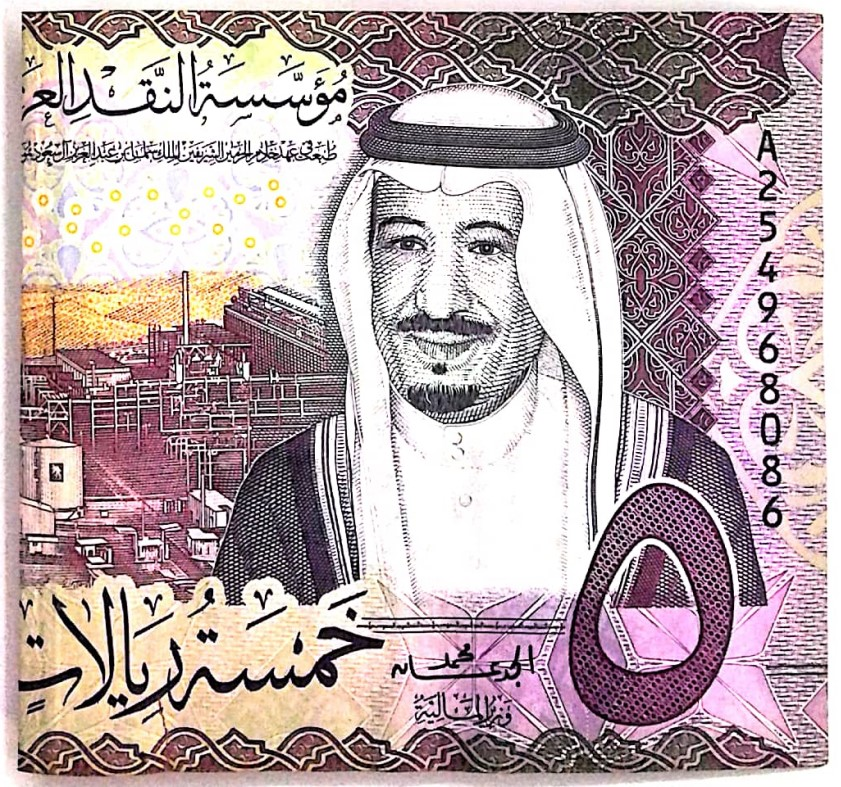

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.76909983 0.23090005 0.00000008]]
0
This is 5 Saudi Riyals


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224)

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224, 224,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('This is 5 Saudi Riyals')
elif input_pred_label == 1:
  print('This is 10 Saudi Riyals')
else:
  print('This is 50 Saudi Riyals')

Model Tuning

In [194]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [195]:
num_of_classes = 3

model_1 = keras.Sequential([
keras.layers.InputLayer((224, 224, 3)),
data_augmentation,
keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.10),


keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.GlobalAveragePooling2D(),
keras.layers.Dense(1028, activation='relu'),

keras.layers.Dense(num_of_classes, activation='softmax')
])

In [196]:
# compile the neural network
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [197]:
model_1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 220, 220, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 106, 106, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_17     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1028)           │       264,196 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │         3,087 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662,211 (2.53 MB)

 Trainable params: 662,211 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [198]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                   factor  =0.5,
                                                    patience=5,
                                                    min_lr=0.00001)

In [199]:
# training the neural network
model_1.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=100, callbacks=[early_stopping,reduce_lr])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - acc: 0.3303 - loss: 1.1010 - val_acc: 0.3913 - val_loss: 1.0982 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - acc: 0.3911 - loss: 1.0959 - val_acc: 0.5435 - val_loss: 1.0578 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - acc: 0.4548 - loss: 1.0514 - val_acc: 0.2391 - val_loss: 1.1237 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - acc: 0.4048 - loss: 1.0720 - val_acc: 0.5217 - val_loss: 0.9869 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - acc: 0.5709 - loss: 0.9992 - val_acc: 0.4783 - val_loss: 0.9740 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - acc: 0.5344 - loss: 0.9526 - val_acc: 0.5435 - val_loss: 0.8656 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - acc: 0.5901 - loss: 0.8656 - val_acc: 0.5652 - val_loss: 0.8768 - learning_rate: 0.0010

**Model Evaluation**

In [219]:
loss, accuracy = model_1.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.9592 - loss: 0.1826
Test Accuracy = 0.9473684430122375


In [221]:
model_1.predict(X_test[0].reshape(1,224, 224,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9999989 , 0.        , 0.00000107]], dtype=float32)

In [222]:
Y_test[0]

np.int64(2)

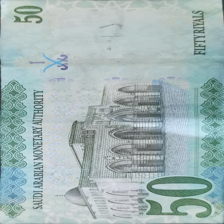

In [223]:
cv2_imshow(X_test[0])

In [206]:
model_1.predict(X_test[33].reshape(1,224, 224,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1., 0., 0.]], dtype=float32)

In [207]:
Y_test[33]

np.int64(1)

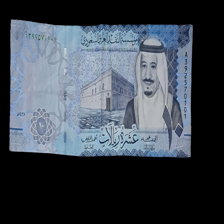

In [208]:
cv2_imshow(X_test[33])

In [209]:
model_1.predict(X_test[34].reshape(1,224, 224,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1., 0., 0.]], dtype=float32)

In [210]:
Y_test[34]

np.int64(0)

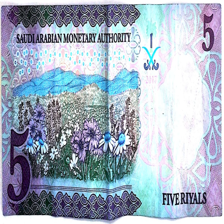

In [211]:
cv2_imshow(X_test[34])

Path of the image to be predicted: /content/SR 5 (5).jpg


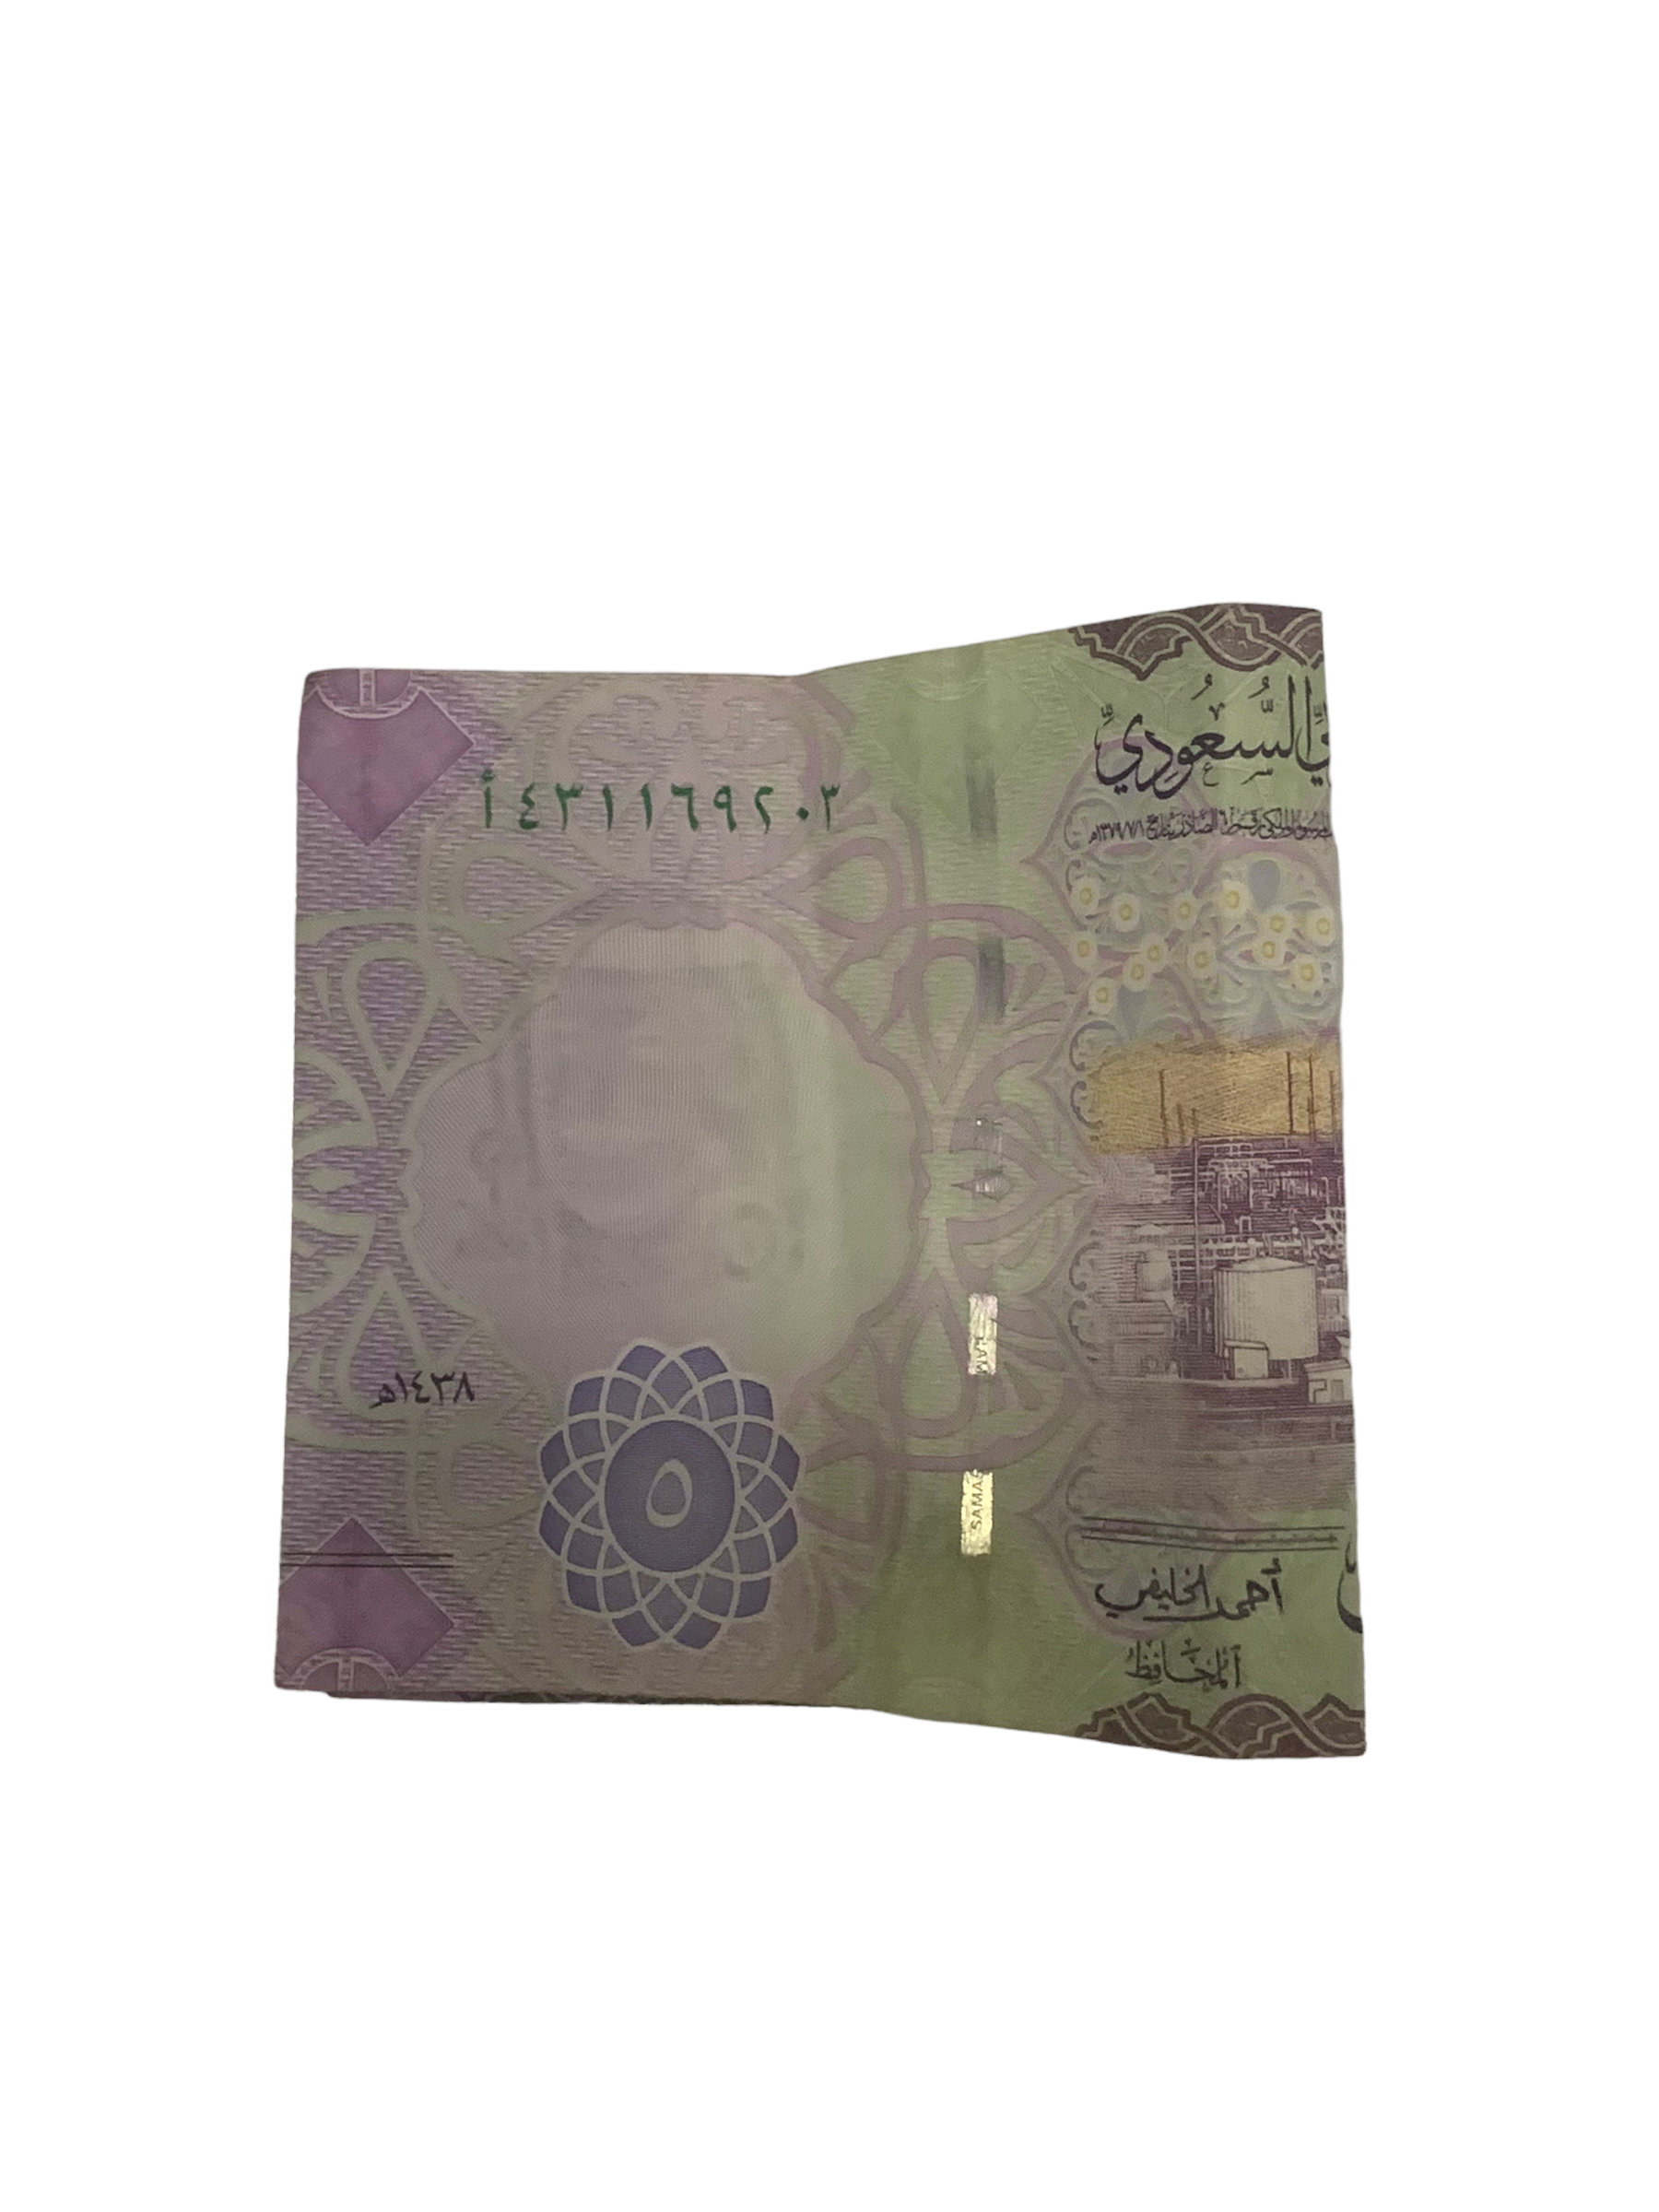

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.9933848  0.00000004 0.00661516]]
0
This is 5 Saudi Riyals


In [229]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
# input_image = X_test[0]
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224, 224,3])

input_prediction = model_1.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('This is 5 Saudi Riyals')
elif input_pred_label == 1:
  print('This is 10 Saudi Riyals')
else:
  print('This is 50 Saudi Riyals')

In [224]:
model_1.save("money_model.h5")


In [214]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model with weights from 'imagenet'
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the final model
MobileNetV2_model = keras.models.Sequential([
    base_model,  # Add the MobileNetV2 model as part of the network
    keras.layers.Flatten(),  # Flatten the output
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(3, activation='softmax')  # Output layer
])

# Compile the model
MobileNetV2_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
MobileNetV2_model.fit(X_train_scaled, Y_train, epochs=10)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.4686 - loss: 11.3867
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7577 - loss: 1.2287
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9142 - loss: 0.2647
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9497 - loss: 0.1611
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9921 - loss: 0.0346
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9948 - loss: 0.0102
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9974 - loss: 0.0049
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9984 - loss: 0.0056


Path of the image to be predicted: /content/SR 5 (5).jpg


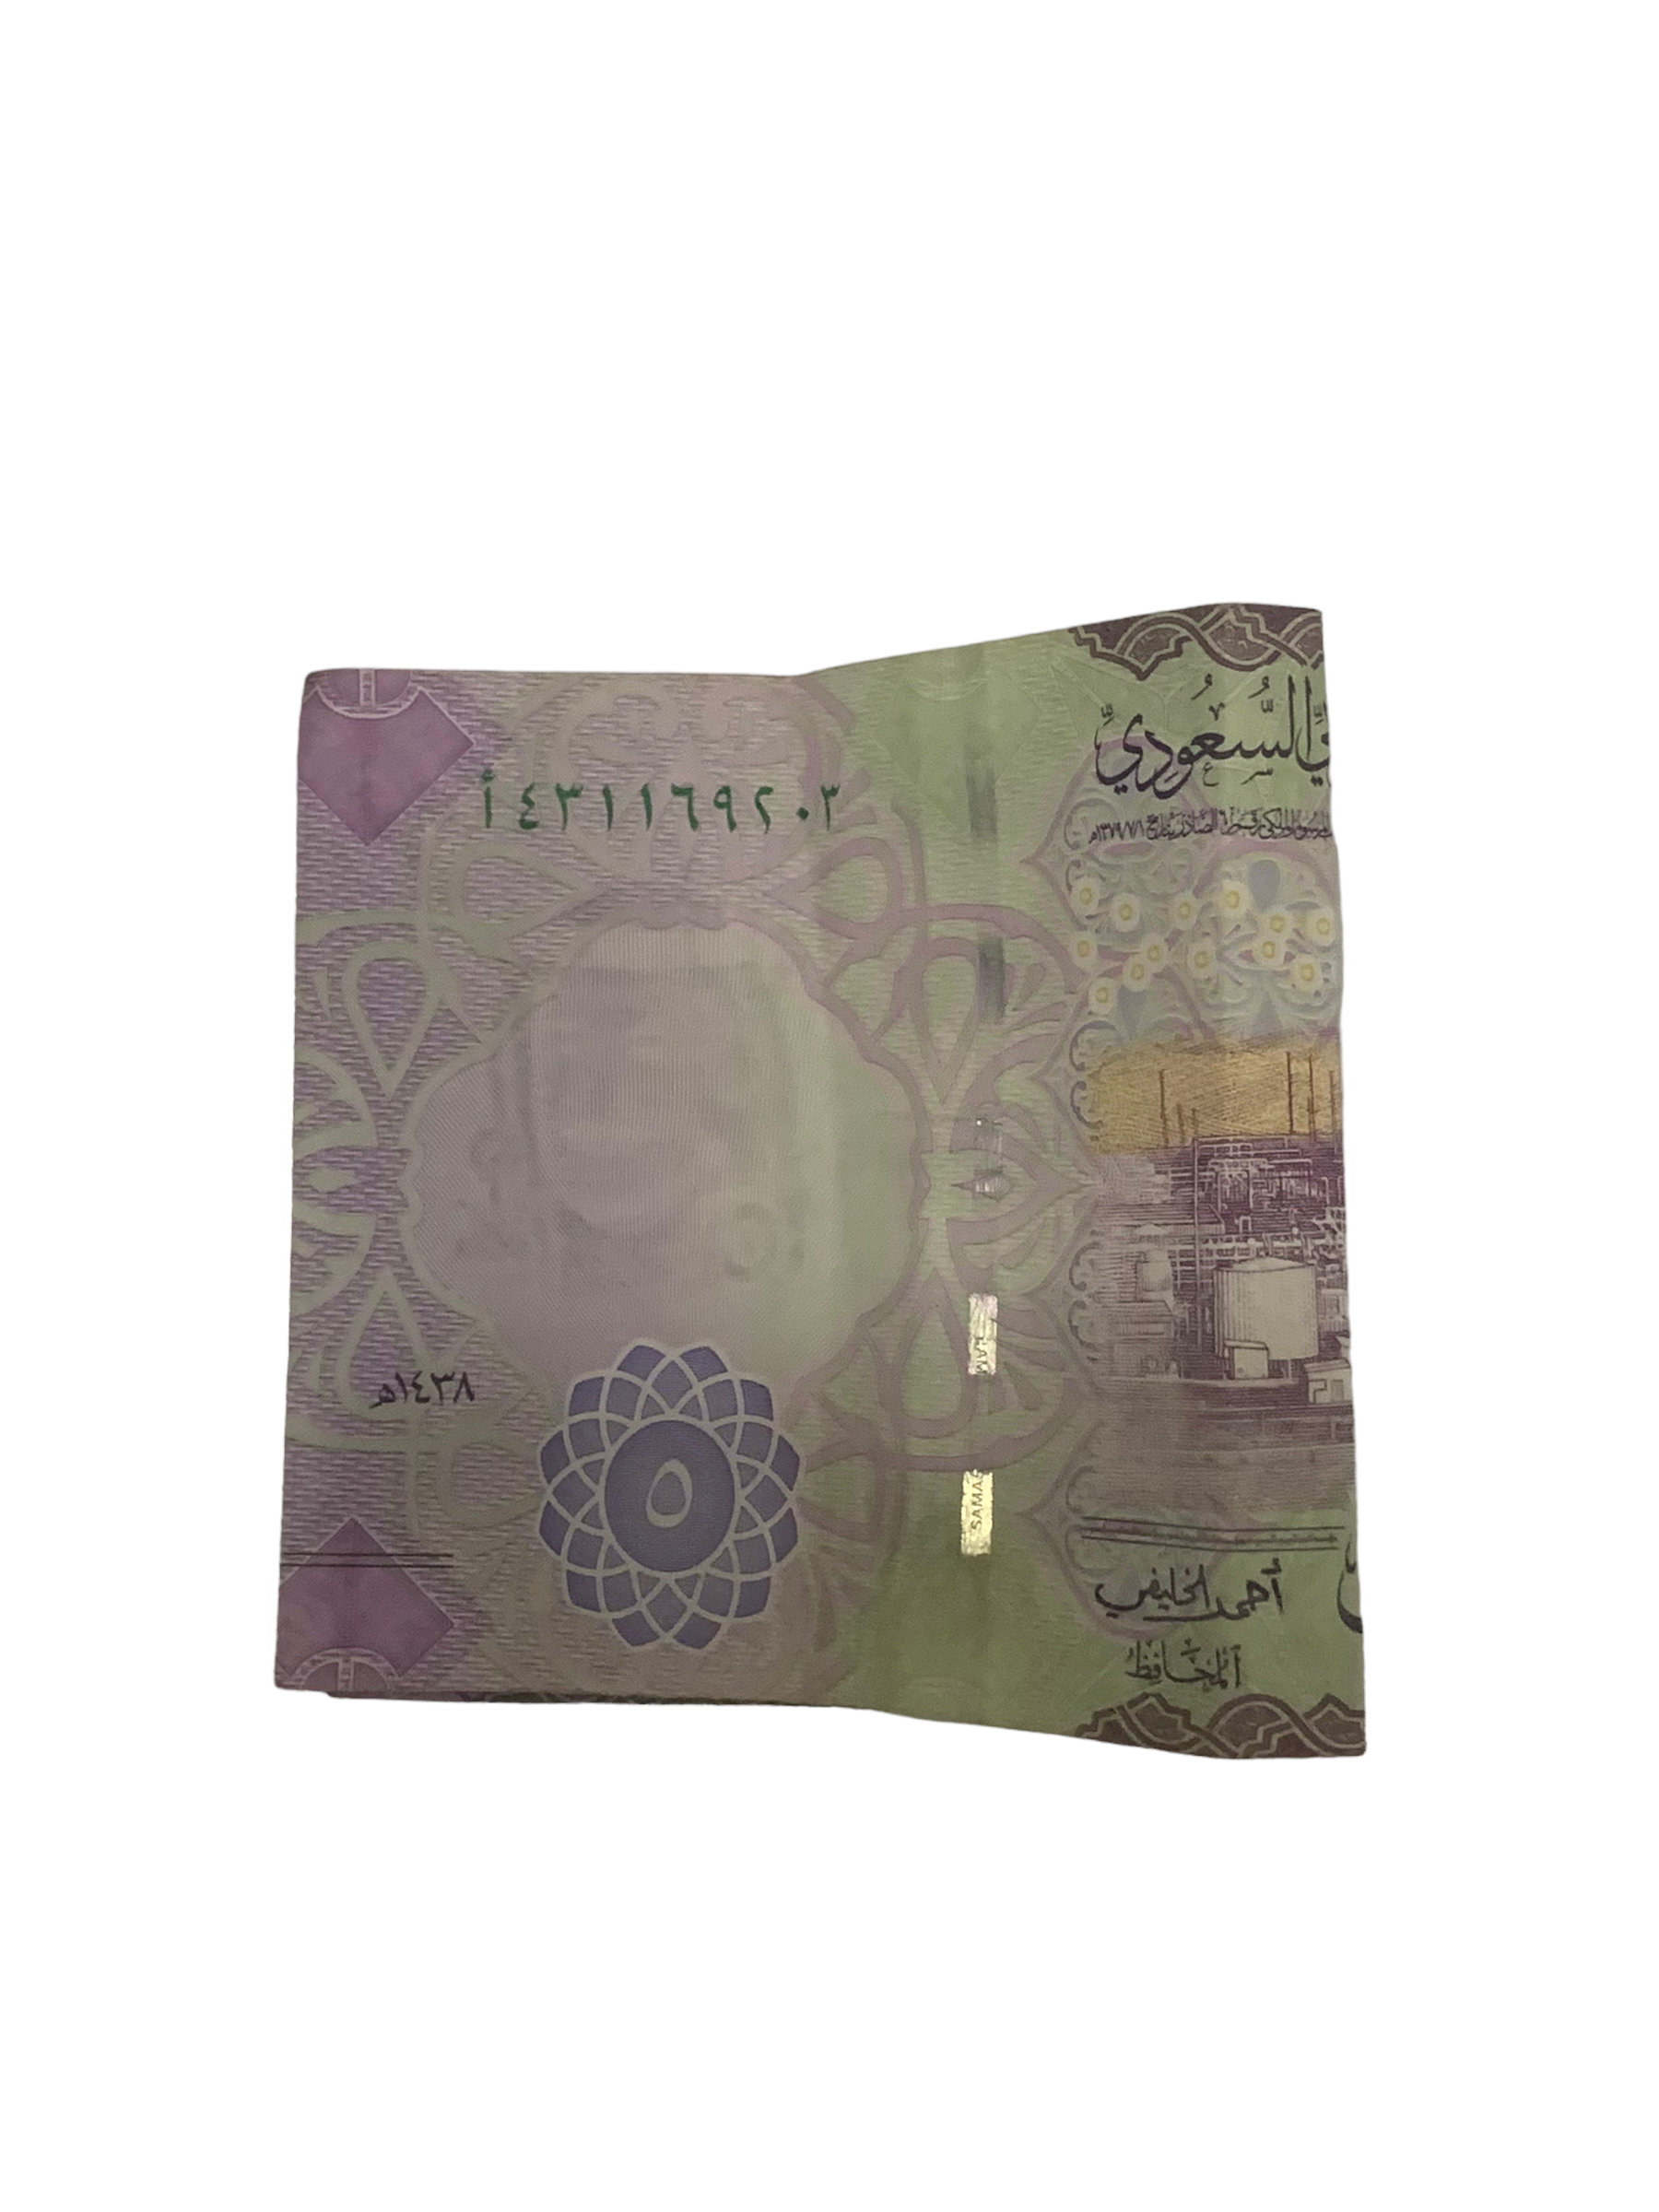

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.9672994  0.03247545 0.00022518]]
0
This is 5 Saudi Riyals


In [228]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
# input_image = X_test[0]
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224, 224,3])

input_prediction = MobileNetV2_model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('This is 5 Saudi Riyals')
elif input_pred_label == 1:
  print('This is 10 Saudi Riyals')
else:
  print('This is 50 Saudi Riyals')

In [230]:
MobileNetV2_model.save("MobileNetV2_model.h5")